# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [4]:
#def P1(num_examples=5):
### STUDENT START ###

# set the number of example
num_examples = 5

# loop through each possible, printing the label, the text, and a new line
for example in range(num_examples):
    print "Label:", newsgroups_train.target_names[train_labels[example]]
    print "Text:", train_data[example]
    print "\n"

### STUDENT END ###
#P1()

Label: comp.graphics
Text: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Label: talk.religion.misc
Text: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [5]:
#def P2():
### STUDENT START ###

# initalize a new count vectorizer with the goal of creating feature vectors 
bag = CountVectorizer()

# transform the data into feature vectors
bag_train = bag.fit_transform(train_data)

## part a.
print "PART A."

# find the shape of the feature vectors
bag_shape = bag_train.shape

print "The size of the vocabulary is", bag_shape[1]

# create a variable to hold the total number of non-zero features for each example
nonzeroes = 0

# loop through each example in the training data
for example in bag_train:
    
    # add the number of non-zeros to the nonzeros variable
    nonzeroes = nonzeroes + example.nnz

# calculate the average number of nonzero features for each example
nonzeroes_avg = float(nonzeroes) / float(len(train_data))

print "The average number of nonzero features for each example is", nonzeroes_avg

# find the number of non-zero entries in the matrix
bag_nonzero = bag_train.nnz

# calculate the total number of entries
bag_total = bag_shape[0] * bag_shape[1]

# calcualte the portion of entries that are non-zero
bag_nonzero_portion = float(bag_nonzero) / float(bag_total)

print "The portion is nonzero entries in the matrix is", bag_nonzero_portion

## part b. 
print "\n"
print "PART B."

# get the 0th feature name
print "The 0th feature is a digit,", bag.get_feature_names()[0]

# get the last feature name
print "The last feature is", bag.get_feature_names()[-1]

## part c. 
print "\n"
print "PART C."

# specify my own vocabulary
vocab = {"atheism":0, "graphics":1, "space":2, "religion":3}

# create a new model with the vocabulary
bag2 = CountVectorizer(vocabulary=vocab)

# fit the model to the data
bag_train2 = bag2.fit_transform(train_data)

# find the shape of the model
bag_shape2 = bag_train2.shape

# the shape is correct if we have columns of the new vocabulary and the same number
# of rows for examples
print "I confirm the the shape of the model is appropriate because the model still has", bag_shape2[0], "rows, \
and has", bag_shape2[1], "columns, equal to the number of vocabulary words."

# create a variable to hold the total number of non-zero features for each example
nonzeroes2 = 0

# loop through each example in the training data
for example in bag_train2:
    
    # add the number of non-zeros to the nonzeros variable
    nonzeroes2 = nonzeroes2 + example.nnz

# calculate the average number of nonzero features for each example
nonzeroes_avg2 = float(nonzeroes2) / float(len(train_data))

print "Now, the average number of nonzero features for each example is", nonzeroes_avg2 

## part d. 
print "\n"
print "PART D."

# create a bigram count vectorizer, use 'char_wb' option to limit the bigrams to within
# word boundaries
bigram = CountVectorizer(analyzer='char_wb',ngram_range=(0,2))

# fit and transform the data with the bigram count vectorizer
bigram_vector = bigram.fit_transform(train_data)

# create a trigram count vectorizer, use 'char_wb' option to limit the bigrams to within
# word boundaries
trigram = CountVectorizer(analyzer='char_wb',ngram_range=(0,3))

# fit and transform the data with the trigram count vectorizer
trigram_vector = trigram.fit_transform(train_data)

# print the concluding statement
print "The bigram vectorizer has a vocabulary of", bigram_vector.shape[1], ", and the trigram \
vectorizer has a vocabulary of", trigram_vector.shape[1], ". I chose to bound my ngrams by white space to \
limit my ngrams to word boundaries."

## part e. 
print "\n"
print "PART E."

# initalize a new count vectorizer that prunes words in less than 10 documents
prune = CountVectorizer(min_df=10)

# fit and transform the data with the pruning count vectorizer
prune_vector = prune.fit_transform(train_data)

# print the size of the vocabulary
print "The size of the vocabulary when we prune words that appear in less than ten documents is", prune_vector.shape[1]

## part f. 
print "\n"
print "PART F."

# create a new count vectorizer
bagdev = CountVectorizer()

# covert the vocabulary to a bag of words
bagdev_train = bagdev.fit_transform(dev_data)

# setify the vocabulary of both the training data and the dev data
vocab_train = set(bag.vocabulary_)
vocab_dev = set(bagdev.vocabulary_)

# dev words missing from training data
dev_missing = len(vocab_dev - vocab_train)

# total dev words
dev_total = len(vocab_dev)

# calculate the fraction missing
dev_missing_fraction = float(dev_missing) / float(dev_total)

print "The fraction of words in dev data missing from the training data is", dev_missing_fraction

### STUDENT END ###
#P2()

PART A.
The size of the vocabulary is 26879
The average number of nonzero features for each example is 96.7059980334
The portion is nonzero entries in the matrix is 0.00359782722696


PART B.
The 0th feature is a digit, 00
The last feature is zyxel


PART C.
I confirm the the shape of the model is appropriate because the model still has 2034 rows, and has 4 columns, equal to the number of vocabulary words.
Now, the average number of nonzero features for each example is 0.268436578171


PART D.
The bigram vectorizer has a vocabulary of 3168 , and the trigram vectorizer has a vocabulary of 29032 . I chose to bound my ngrams by white space to limit my ngrams to word boundaries.


PART E.
The size of the vocabulary when we prune words that appear in less than ten documents is 3064


PART F.
The fraction of words in dev data missing from the training data is 0.247876400345


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [6]:
#def P3():
### STUDENT START ###

## K nearest neighbors model
print "K NEAREST NEIGHBORS"

# vectorize the dev data with the same model
bag_dev = bag.transform(dev_data)

# initalize variables to hold the maximum k and maximum f1 score
max_k = 0
max_f1 = 0

# lets loop through a reasonable range of k's, 1 through 20
for k in range(1,21):
    # initalize a k-nearest neighbors classifier
    kneighbors = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model on the training data
    kneighbors.fit(bag_train, train_labels)

    # predict the development data
    predictions = kneighbors.predict(bag_dev)

    # calculate the f1 score
    f1_score = metrics.f1_score(dev_labels, predictions, average='weighted')
    
    # check to see if the calculated f1 score is greater than the stored max f1 score
    if f1_score > max_f1:
        
        # set the new k and max f1 score
        max_k = k
        max_f1 = f1_score
        
        # calculate an accuracy value
        accuracy = np.mean(predictions==dev_labels)

# print out the best k value and its accompanying f1 score
print "When creating a k nearest neighbors model, the optimal value of k, that produces the highest \
F1 score, is", max_k, ", which produces a F1 score of", max_f1, ". The accuracy is", accuracy

## Multinomial naive bayes model
print "\n"
print "MULTINOMIAL NAIVE BAYES"

# initalize the multinomail naive bayes model
Multinomial = MultinomialNB()

# initalize a set of reasonable alphas that we would like to search for the optimal alpha
MNparameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# set the alpha search with the given alpha options and the Multinomial model
alpha_search = GridSearchCV(Multinomial,MNparameters)

# fit the Gridsearch model on the training data
alpha_search.fit(bag_train,train_labels)

# find the best parameter
best_alpha = alpha_search.best_params_

# fit a model with the best alpha
Multinomial_optimal = MultinomialNB(alpha = best_alpha['alpha'])
Multinomial_optimal.fit(bag_train,train_labels)

# calculate the accuracy for this multinomial model
MN_predictions = Multinomial_optimal.predict(bag_dev)
MN_accuracy = np.mean(MN_predictions == dev_labels)

# write the concluding sentence
print "The best alpha for the multinomial naive bayes model is", best_alpha['alpha'], "with \
an accuracy of", MN_accuracy

## Logistic regression model
print "\n"
print "LOGISTIC REGRESSION MODEL"

# initalize the logistic regression model
logistic = LogisticRegression()

# initalize a reasonable set of C values
Lparameters = {'C':[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 100.0]}

# set the C search with the given C options and the logistic model
C_search = GridSearchCV(logistic,Lparameters)

# fit the Gridsearch model to the data
C_search.fit(bag_train,train_labels)

# find the best C parameter
best_C = C_search.best_params_

# initalize a model with the best C
logistic_optimal = LogisticRegression(C = best_C['C'])
logistic_optimal.fit(bag_train,train_labels)

# use the model to predict the dev data and comput the accuracy
L_predictions = logistic_optimal.predict(bag_dev)
L_accuracy = np.mean(L_predictions == dev_labels)

# write the concluding sentence
print "The best C value for the logistic regression model is", best_C['C'], "with an accuracy of", L_accuracy

## part answers

## part a.
print "\n"
print "PART A."
print "K nearest neighbors does not work well because there are too many features. In high dimensional \
like the example here, there is little difference between the closest and farthest points."

## part b. 
print "\n"
print "PART B."
print "Logistic regression doesn't work as well as Naive Bayes because the logistic regression model draws a \
linear decision boundary whereas Naive Bayes can draw a nonlinear decision boundary."

## part c.
print "\n"
print "PART C."

# loop through each of my potential C values
for c in Lparameters['C']: 
    
    # create the logistic model using the c value
    logistics = LogisticRegression(C = c)
    
    # fit the model on the data
    logistics.fit(bag_train, train_labels)
    
    # create an array to store the sums of the squared coefficients for each class
    sum_squares = []
    
    # loop through each of the classes
    for category in logistics.coef_:
        
        # append the sum of the squares of the coefficients to the storing array
        # round to 4 decimal points to make it cleaner
        sum_squares.append(round(sum(category**2),4))
        
    # print out each C value with the corresponding sum of the squared coeffecients
    print "C: %.4f | " % (c), sum_squares 
    
# briefly describe the relationship between the sum of these weights and the C values
print "\nAs we increase our C value, we also increase the sum of the weights. This relationship is not linear. \
Each subsequent increase in C does not increase the sum of the squared weights as much as the previous increase \
in C. This implies that the relationship is more logarithmic than linear."

### STUDENT END ###
#P3()

K NEAREST NEIGHBORS
When creating a k nearest neighbors model, the optimal value of k, that produces the highest F1 score, is 7 , which produces a F1 score of 0.450479100061 . The accuracy is 0.443786982249


MULTINOMIAL NAIVE BAYES
The best alpha for the multinomial naive bayes model is 0.01 with an accuracy of 0.779585798817


LOGISTIC REGRESSION MODEL
The best C value for the logistic regression model is 0.5 with an accuracy of 0.71449704142


PART A.
K nearest neighbors does not work well because there are too many features. In high dimensional like the example here, there is little difference between the closest and farthest points.


PART B.
Logistic regression doesn't work as well as Naive Bayes because the logistic regression model draws a linear decision boundary whereas Naive Bayes can draw a nonlinear decision boundary.


PART C.
C: 0.0001 |  [0.0077, 0.0119, 0.0094, 0.0091]
C: 0.0010 |  [0.1651, 0.201, 0.1807, 0.1872]
C: 0.0100 |  [2.5415, 2.9397, 2.8625, 2.25]
C: 0.1000 | 

ANSWER: See above code for answers.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [7]:
#def P4():
### STUDENT START ###

## logistic regression model with words

# initalize a new logistic regression model
logistic_words = LogisticRegression()

# fit the model to the training data
logistic_words.fit(bag_train,train_labels)

# write a function to find the largest coefficients for a logarithmic regression model
def findMaxCoef(model, num_max = 1):
    "Finds the top num_max weights for each of the classes of a logistic regression model"

    # initalize an array to hold the indices of these weights, the ending length of the
    indices = []
    
    # loop through each class' coefficients
    for category in model.coef_:
        
        # create a new list to hold all the coefficients, this is one we intend to modify
        # as we find the top num_max weights
        coefficients = []
        
        # copy the coefficients into a new list
        for coefficient in category:
            coefficients.append(coefficient)

        # add to the indices the number of weights we want
        for weight in range(num_max):
            
            # get the index of the current max
            index = np.argmax(coefficients)
            
            # add the current max of the coefficients
            indices.append(index)
            
            # replace the max coefficient with zero
            coefficients[index] = 0
    
    # return the array of indices, which will be the number of classes multiplied by the number of weights
    return indices

# write a function to create a table for each class of a logarthmic function with the highest weights
def tableLogCoefs(model, bagged, num_max = 1):
    "function that takes a logarthmic model and outputs a class x num_max table, where num_max is the largest features"
    
    # find the indices for the largest num_max weights
    indices = findMaxCoef(model, num_max)
    
    # loop through each index printing out the weight for each class
    for index in indices:
        
        # create an array to hold the weights for each class
        weights = []
        
        # loop through each class
        for category in model.coef_:
            
            # append to the weights array, the coefficient at the index
            # round to 4 decimal places to make it easier to read
            weights.append(round(category[index],4))
        
        # print out the feature and weights for each class
        print "Feature:", bagged.vocabulary_.keys()[index], " | Weights:", weights

# create the table for the logistic regression model with the top 5 weights for each class
# print the labels for the classes at the top
print "LOGISTIC REGRESSION, GREATEST WEIGHTS WITH WHOLE WORDS"
print "Classes: ", newsgroups_train.target_names
tableLogCoefs(logistic_words, bag, 5)
print "\n"
        
## logistic regression model with bigrams

# create a new logistic regression model that uses bigram words instead
# fit it to the bigram data, already created in question 2 above
logistic_bigrams = LogisticRegression()
logistic_bigrams.fit(bigram_vector,train_labels)

# use our already existing functions to create the table of weights for a bigram analysis
# remember that we already created a bigram bag of words above, let's re-use it
print "\n"
print "LOGISTIC REGRESSION, GREATEST WEIGHTS WITH BIGRAMS"
print "Classes: ", newsgroups_train.target_names
tableLogCoefs(logistic_bigrams, bigram, 5)

## concluding thoughts

# print some concluding thoughts
print "\n"
print "\n"
print "The bigram logarithmic regression model had much lower weights than the word based model, implying \
that a given bigram feature provides less predictive power than a complete word. I was surprised by the fact that\
 nonsensical features, like \"8*\" were the bigrams with the greatest weights. I would have expected more word \
prefixes and suffixes."

### STUDENT END ###
#P4()

LOGISTIC REGRESSION, GREATEST WEIGHTS WITH WHOLE WORDS
Classes:  ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
Feature: speaking  | Weights: [1.125, -0.3982, -0.4204, -0.3962]
Feature: imaginative  | Weights: [1.0304, -0.0974, -0.3208, -0.8349]
Feature: attributes  | Weights: [0.9899, -0.2207, -0.3406, -0.4633]
Feature: pointy  | Weights: [0.9538, -0.6168, -0.7924, -0.0644]
Feature: ucrl  | Weights: [0.9395, -0.4106, -0.4494, -0.4348]
Feature: plastic  | Weights: [-0.7584, 1.9361, -1.3359, -0.7625]
Feature: 89  | Weights: [-0.5825, 1.3463, -0.826, -0.4702]
Feature: capitalization  | Weights: [-0.3348, 1.2668, -0.8065, -0.6263]
Feature: complicates  | Weights: [-0.3589, 1.1251, -0.7021, -0.3787]
Feature: washington  | Weights: [0.1439, 0.9775, -0.6819, -0.4865]
Feature: 2004  | Weights: [-1.2601, -1.3162, 2.1622, -1.1708]
Feature: exiting  | Weights: [-0.414, -0.6714, 1.2248, -0.6289]
Feature: mania  | Weights: [-0.5724, -0.4798, 1.0114, -0.4676]
Feature: future  |

ANSWER: See above for answers.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [8]:
#def empty_preprocessor(s):
#    return s

#def better_preprocessor(s):
### STUDENT START ###

### STUDENT END ###

#def P5():
### STUDENT START ###

# let's create a function to preprocess our data, let's start by lowercasing everything
def preLower(text_array):
    "lowercase all the words for each text in a given array of texts"
    
    # create an array to hold the preprocessed text
    processed = []
    
    # loop through each text in the array of texts
    for text in text_array:
        
        # lowercase the text and append it to the processed array
        processed.append(text.lower())
    
    # return the preprocessed text
    return processed

# let's create a function to replace numbers with a token, ^
def preNoNumber(text_array):
    "replace all numbers with a token, ^"
    
    # create an array to hold the preprocessed text
    processed = []
    
    # loop through each text in the array of texts
    for text in text_array:
        
        # replace each sequence of digits with the token "^" and append it to the processed array
        processed.append(re.sub("\d+","^",text))
    
    # return the preprocessed text
    return processed

# let's create a function to replace other non-letter characters with a space
def preReadable(text_array):
    "replace all non-letter characters with a space"
    
    # create an array to hold the preprocessed text
    processed = []
    
    # loop through each text in the array of texts
    for text in text_array:
        
        # remove each sequence of non-alphanumeric characters and append it to the processed array
        # we exempt "^" because it our token for numbers
        processed.append(re.sub("[^a-zA-Z0-9 ^]"," ",text))
    
    # return the preprocessed text
    return processed

# let's create a function to knock out all long words
def preShorten(text_array):
    "deletes all words longer than 8"
    
    # create an array to hold the preprocessed text
    processed = []
    
    # loop through each text in the array of texts
    for text in text_array:
        
        # remove each word longer than 8 
        processed.append(re.sub(r"\W*\b\w{8,}\b","",text))
    
    # return the preprocessed text
    return processed

# let's create a function that runs a text through all the preprocessers we just created
def preProcessAll(text_array):
    "runs an array of texts through multiple pre-processors"
    
    # return the array that is completely pre-processed
    # return preLower(preNoNumber(preReadable(preShorten(text_array))))
    # I have commented out the above code because the resulting pre-processing
    # actually produces worse results. It can be uncommented to completely pre-
    # process the text
    
    # return the preprocessed array
    return preReadable(text_array)

# preproccess the training and the dev data
pre_train = preProcessAll(train_data)
pre_dev = preProcessAll(dev_data)

# create a new bag of words model, fitted to the training data
# also go ahead and transform the dev data
# as a preprocessing step, create the vectorizer to only use English words
pre_bag = CountVectorizer(stop_words='english')
pre_train_bag = pre_bag.fit_transform(pre_train)
pre_dev_bag = pre_bag.transform(pre_dev)

# create a base logistic regression model for comparison
logistic_base = LogisticRegression()

# fit the base logistic regression model to the data and use it to predict the dev data
logistic_base.fit(bag_train,train_labels)
predictions_base = logistic_base.predict(bag_dev)

# calculate the f1 score
f1_score_base = metrics.f1_score(dev_labels, predictions_base, average='weighted')
print "The F1 score for the basic logistic regression model is", f1_score_base

# create a logistic regression model for the preprocessed data
logistic_pre = LogisticRegression()

# fit the logistic regression to the data and use it to predict the dev data
logistic_pre.fit(pre_train_bag,train_labels)
predictions_pre = logistic_pre.predict(pre_dev_bag)

# calculate the f1 score
f1_score_pre = metrics.f1_score(dev_labels, predictions_pre, average='weighted')
print "The F1 score for the logistic regression model with preprocessed data is", f1_score_pre
print "By pre-processing my data, I improved the F1 score by", f1_score_pre - f1_score_base

# calculate the reduction in the size of the dictionary
print "My new preprocessor reduced the size of my dictionary by", bag_train.shape[1] - pre_train_bag.shape[1], "words."

### STUDENT END ###
#P5()

The F1 score for the basic logistic regression model is 0.694417287185
The F1 score for the logistic regression model with preprocessed data is 0.727065523843
By pre-processing my data, I improved the F1 score by 0.0326482366573
My new preprocessor reduced the size of my dictionary by 735 words.


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

The logistic regression with L1 penalty produces 1609 nonzero weights, while the logistic regression with L2 penalty produces 107516 nonzero weights. The L1 penalty produces 105907 fewer weights.


C: 0.1  | Vocabulary Size: 212  | Accuracy: 0.380177514793
C: 0.5  | Vocabulary Size: 733  | Accuracy: 0.486686390533
C: 1.0  | Vocabulary Size: 1104  | Accuracy: 0.504437869822
C: 5.0  | Vocabulary Size: 2339  | Accuracy: 0.525147928994
C: 10.0  | Vocabulary Size: 2571  | Accuracy: 0.538461538462
C: 20.0  | Vocabulary Size: 3348  | Accuracy: 0.545857988166
C: 50.0  | Vocabulary Size: 5881  | Accuracy: 0.609467455621
C: 100.0  | Vocabulary Size: 7561  | Accuracy: 0.621301775148
C: 250.0  | Vocabulary Size: 11831  | Accuracy: 0.671597633136
C: 1000.0  | Vocabulary Size: 23344  | Accuracy: 0.687869822485


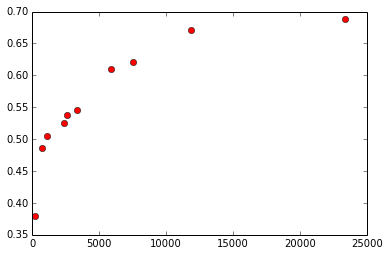

In [13]:
#def P6():

# Keep this random seed here to make comparison easier.
np.random.seed(0)

### STUDENT START ###

# create a new logistic regression model with L1 penalty and fit it to the data
logistic_L1 = LogisticRegression(penalty='l1')
logistic_L1.fit(bag_train,train_labels)

# create a logistic regression model with the standard L2 penalty as a base comparison
logistic_L2 = LogisticRegression(penalty='l2')
logistic_L2.fit(bag_train,train_labels)

# compare the nonzero weights of the logistic regressions created with L1 and L2 penalties
print "The logistic regression with L1 penalty produces", np.count_nonzero(logistic_L1.coef_), "nonzero weights,\
 while the logistic regression with L2 penalty produces", np.count_nonzero(logistic_L2.coef_), "nonzero weights. \
The L1 penalty produces", np.count_nonzero(logistic_L2.coef_) - np.count_nonzero(logistic_L1.coef_), "fewer weights."
print "\n"

## create a plot to compare the accuracy of the retrained model with the size of the vocabulary

# set a reasonable range of C values to test
Cs = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 250.0, 1000.0]

# initalize an array to hold the vocabulary sizes and accuracies as we go about the pruning
vocabulary_sizes = []
accuracies = []

# train a logistic model with each of these C values
for c in Cs:
    
    # create a new bag of words model as we intend to destroy some of the vocabulary as we remove features
    # initalize it with a fit_transform on the inital data
    bag_log = CountVectorizer()
    bag_log.fit_transform(train_data)
    
    # vectorize the training data
    bag_log_train = bag_log.transform(train_data)
    
    # initalize a new logistic regression model, relax the convergence criteria and set the C
    # fit the model on the training data
    logistic_L1_c = LogisticRegression(tol=0.01, C=c, penalty='l1')
    logistic_L1_c.fit(bag_log_train,train_labels)
    
    # create an array to store the sum of the weights across all four classes
    weights = []
    
    # loop through each feature in the regression
    for feature in range(len(logistic_L1_c.coef_[0])):
        
        # initalize the sum of weights at zero
        sum_weights = 0.0
        
        # loop through each class
        for category in logistic_L1_c.coef_:
            
            # add the weight to the sum_weights variable
            sum_weights = sum_weights + abs(category[feature])
            
        # append the weight for each feature to the weights array
        weights.append(sum_weights)
    
    # turn the vocabulary into a set that we might index it
    vocab = []
    vocab_set = set(bag_log.vocabulary_)
    for word in vocab_set:
        vocab.append(word)
    
    # create an array to store the new vocabulary that we care about
    new_vocab = []
    
    # loop through the weights and eliminate from the vocabulary those features with a weight of zero
    for index,weight in enumerate(weights):
        
        # if the weight for the feature is greater zero
        if weight > 0:
            
            # identify the vocabulary word
            vocab_interest = vocab[index]

            # add the vocabulary to our new vocab array
            new_vocab.append(vocab_interest)
            
    # store the size of the remaining vocabulary
    vocabulary_sizes.append(len(new_vocab))
    
    # convert our new vocabulary to a set
    new_vocab = set(new_vocab)
    
    # create a new CountVectorizer model with this new vocabulary
    pruned_bag = CountVectorizer(vocabulary=new_vocab)
    
    # vectorize the data with this pruned vocabulary
    bag_train_pruned = pruned_bag.transform(train_data)
    
    # run a new logistic regression model with a L2 penalty
    logistic_L2_pruned = LogisticRegression(tol=0.01)
    logistic_L2_pruned.fit(bag_train_pruned,train_labels)
    
    # vectorize the dev data
    dev_pruned = pruned_bag.transform(dev_data)
    
    # calculate the accuracy of this logistic regression model and store it
    predictions_L2 = logistic_L2_pruned.predict(dev_pruned)
    accuracy_L2 = np.mean(predictions_L2 == dev_labels)
    accuracies.append(accuracy_L2)
    
# print out the table that we will graph
for index,c in enumerate(Cs):
    print "C:", c, " | Vocabulary Size:", vocabulary_sizes[index], " | Accuracy:", accuracies[index] 
    
# plot the accuracy against the vocabulary size for the various C values
plt.plot(vocabulary_sizes, accuracies, 'ro')
plt.show()

### STUDENT END ###
#P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [18]:
#def P7():
### STUDENT START ###

print "TF-IDF is short for frequency-inverse document frequency. It creates a matrix differently than \
CountVectorizer. CountVectorizer simply produces a bag of words matrix which produces for each document a \
vector with values of each word present in the model's vocabulary. TF-IDF adds a layer of complexity. It weights\
 each word by its frequency in the corpus of documents. This decreases the value of those words that appear \
commonly throughout the corpus.\n"

# initalize a TFIDF vectorizer and create the model with the training data
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(train_data)

# train a logistic regression model with C=100
logistic_tfidf = LogisticRegression(C=100)
logistic_tfidf.fit(tfidf_train,train_labels)

# transform the dev data into a vector and then predict the labels
tfidf_dev = tfidf.transform(dev_data)
predictions_tfidf = logistic_tfidf.predict(tfidf_dev)

# initalize an array to hold the r-ratios
r_ratios = []

# calculate an R ratio for each dev data, such that R is maximum predicted probability
# over the predicted probability of the correct label
# loop through each text in the dev data
for index,text in enumerate(tfidf_dev):
    
    # pull the maximum of the predicted probabilities
    max_pred = max(logistic_tfidf.predict_proba(text)[0])

    # pull the correct probability
    actual_pred = logistic_tfidf.predict_proba(text)[0][dev_labels[index]]
    
    # calculate the R ratio
    r_ratio = float(max_pred) / float(actual_pred)
    r_ratios.append(r_ratio)

# convert the r_ratios array to a numpy array
r_ratios = np.array(r_ratios)    

# get the indices of the 3 texts with the highest R-ratios
max_indices = np.argpartition(r_ratios,-3)[-3:]

# print out the texts at these indices
for index in max_indices:
    print "************************************"
    print "R-ratio:", r_ratios[index]
    print train_data[index]
    print "************************************"
    print "\n"

# print some suggestions for improving the model
print "We could improve the model by pre-processing some of the data. For exmaple, perhaps we could generalize \
numbers. In one of the examples above, the text used lots of measurements (e.g. '13 fps', '1.3 MB'). By using a \
token of some sort to represent numbers, we could focus on the units or other parts of the text that better \
describe this text than the specific numbers of this writer's particular circumstances. Another commonality \
from these examples above is their length. Perhaps the model is having trouble with longer texts. We could \
preprocess the data so that no text was longer than a specified length."
    
    
## STUDENT END ###
#P7()

TF-IDF is short for frequency-inverse document frequency. It creates a matrix differently than CountVectorizer. CountVectorizer simply produces a bag of words matrix which produces for each document a vector with values of each word present in the model's vocabulary. TF-IDF adds a layer of complexity. It weights each word by its frequency in the corpus of documents. This decreases the value of those words that appear commonly throughout the corpus.

************************************
R-ratio: 287.179061792

First off, let me congratulate you for not posting a flame about "You sick
perverts, you are immoral, you are all going to hell.", which seems to be the
usual "religious" post found on the alt.sex.* hierarchy.  Hopefully, you won't
get flamed, either.

You will, however, be argued with.  I personally think that your project is
built on unsteady ground.

First, I do not believe that there is any way to find an "objective morality". 
Morality and value are inherently subjective - th

ANSWER: See above for answers.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.